In [ ]:
# ! pip install pillow
# ! pip install keras
# ! pip install matplotlib

In [1]:
from tensorflow.keras.models import load_model

In [2]:
model = load_model('age_model.hdf5')

In [3]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_input (InputL [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)     

In [4]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

def loadImage(filepath):
    img = image.load_img(filepath, target_size=(224,224))
    plt.imshow(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255
    return img


array([[0.00537575, 0.00552436, 0.00563116, 0.00566637, 0.00546488,
        0.00548221, 0.00552709, 0.00551498, 0.00580298, 0.00569374,
        0.00601503, 0.00571158, 0.00567364, 0.00692388, 0.00643875,
        0.00671045, 0.00830049, 0.00933523, 0.01088013, 0.01391911,
        0.01367853, 0.01516165, 0.01550569, 0.01717   , 0.01704068,
        0.01818859, 0.01751099, 0.01790843, 0.01692324, 0.01688344,
        0.01586719, 0.01553725, 0.01605777, 0.01491523, 0.0148748 ,
        0.01454981, 0.01418129, 0.01329515, 0.01356042, 0.01335759,
        0.01364952, 0.01240911, 0.01230853, 0.01213841, 0.01324242,
        0.01282018, 0.01322682, 0.01227081, 0.01251536, 0.01233735,
        0.01249355, 0.01140517, 0.01186739, 0.01130721, 0.01081592,
        0.01167859, 0.01185024, 0.0105547 , 0.01066914, 0.01073522,
        0.01066555, 0.01063552, 0.0109188 , 0.01083808, 0.00968895,
        0.0086921 , 0.00945319, 0.00990458, 0.00955584, 0.00865746,
        0.00943988, 0.00813213, 0.00817574, 0.00

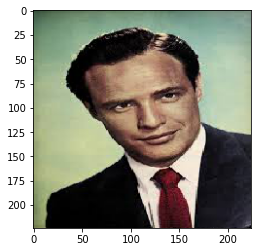

In [5]:
path = 'marlon.jpg'
pred = model.predict(loadImage(path))
pred

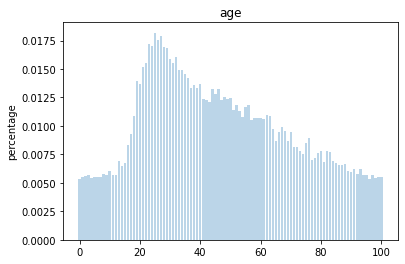

In [6]:
y_pos = np.arange(101)
plt.bar(y_pos, pred[0], align='center', alpha=0.3)
plt.ylabel('percentage')
plt.title('age')
plt.show()

In [7]:
np.argmax(pred) # 27 max value

25

array([[0.00537575, 0.00552436, 0.00563116, 0.00566637, 0.00546488,
        0.00548221, 0.00552709, 0.00551498, 0.00580298, 0.00569374,
        0.00601503, 0.00571158, 0.00567364, 0.00692388, 0.00643875,
        0.00671045, 0.00830049, 0.00933523, 0.01088013, 0.01391911,
        0.01367853, 0.01516165, 0.01550569, 0.01717   , 0.01704068,
        0.01818859, 0.01751099, 0.01790843, 0.01692324, 0.01688344,
        0.01586719, 0.01553725, 0.01605777, 0.01491523, 0.0148748 ,
        0.01454981, 0.01418129, 0.01329515, 0.01356042, 0.01335759,
        0.01364952, 0.01240911, 0.01230853, 0.01213841, 0.01324242,
        0.01282018, 0.01322682, 0.01227081, 0.01251536, 0.01233735,
        0.01249355, 0.01140517, 0.01186739, 0.01130721, 0.01081592,
        0.01167859, 0.01185024, 0.0105547 , 0.01066914, 0.01073522,
        0.01066555, 0.01063552, 0.0109188 , 0.01083808, 0.00968895,
        0.0086921 , 0.00945319, 0.00990458, 0.00955584, 0.00865746,
        0.00943988, 0.00813213, 0.00817574, 0.00

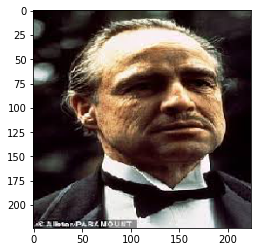

In [8]:
path = 'marlon_old.jpg'
pred = model.predict(loadImage(path))
pred

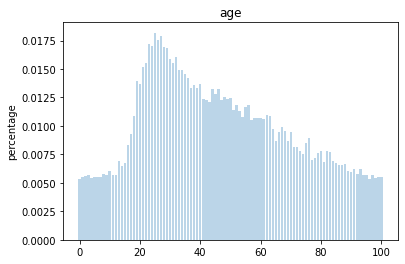

25

In [9]:
y_pos = np.arange(101)
plt.bar(y_pos, pred[0], align='center', alpha=0.3)
plt.ylabel('percentage')
plt.title('age')
plt.show()
np.argmax(pred) # 27 max value

most dominant age class (not apparent age):  25
apparent age:  47


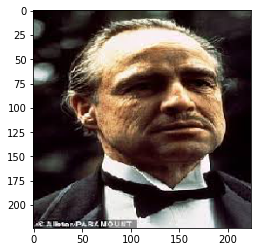

In [12]:
path = 'marlon_old.jpg'
pred = model.predict(loadImage(path))
pred

output_indexes = np.array([i for i in range(0, 101)])
print("most dominant age class (not apparent age): ",np.argmax(pred))
 
apparent_age = np.round(np.sum(pred * output_indexes, axis = 1))
print("apparent age: ", int(apparent_age[0]))

most dominant age class (not apparent age):  25
apparent age:  47


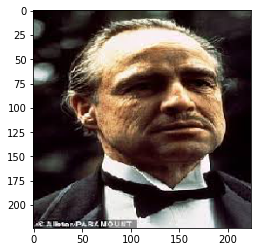

In [11]:
path = 'marlon_old.jpg'
pred = model.predict(loadImage(path))
pred

output_indexes = np.array([i for i in range(0, 101)])
print("most dominant age class (not apparent age): ",np.argmax(pred))
 
apparent_age = np.round(np.sum(pred * output_indexes, axis = 1))
print("apparent age: ", int(apparent_age[0]))